In [6]:
from keras.datasets import reuters
import numpy as np

In [2]:
(x_train, y_train),(x_test,y_test) = reuters.load_data(num_words =10000)
#자주 등장하는 1만개의 단어

2113536/2110848 [==============================] - 0s 0us/step


C:\Users\seach\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\seach\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value,key) for key,value in word_index.items()]
)

557056/550378 [==============================] - 0s 0us/step


In [5]:
decoded_newswire = ' '.join(
    [reverse_word_index.get(i-3 ,'?') for i in x_train[0]]
)

In [11]:
def vectorize_sequences(sequences,dimension = 10000):
    result = np.zeros((len(sequences),dimension))
    
    for idx ,sequences in enumerate(sequences):
        result[idx,sequences] = 1.
        
    return result

In [12]:
final_x_train = vectorize_sequences(x_train)
final_x_test = vectorize_sequences(x_test)

In [17]:
def to_one_hot(labels, demension = 46):
    
    result = np.zeros((len(labels),demension))
    
    for idx ,label in enumerate(labels):
        result[idx,label] = 1
       
    return result

In [23]:
one_hot_train = to_one_hot(y_train)
one_hot_test = to_one_hot(y_test)

In [19]:
from keras.models import Sequential
from keras.layers import Dense,Activation

In [20]:
model = Sequential(
    [
        Dense(64,input_shape = (10000,)),
        Activation('relu'),
        Dense(64),
        Activation('relu'),
        Dense(46),
        Activation('softmax')
    ]
)

In [22]:
model.compile(
    optimizer='rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [26]:
x_val =final_x_train[:1000]
partial_x_train = final_x_train[1000:]

y_val = one_hot_train[:1000]
partial_y_train = one_hot_train[1000:]

In [27]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data=(x_val,y_val)
)

Epoch 1/20
16/16 [==============================] - 0s 26ms/step - loss: 1.4801 - accuracy: 0.6997 - val_loss: 1.3376 - val_accuracy: 0.7040
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 1.0925 - accuracy: 0.7665 - val_loss: 1.1730 - val_accuracy: 0.7390
Epoch 3/20
16/16 [==============================] - 0s 20ms/step - loss: 0.8656 - accuracy: 0.8142 - val_loss: 1.0749 - val_accuracy: 0.7540
Epoch 4/20
16/16 [==============================] - 0s 21ms/step - loss: 0.6995 - accuracy: 0.8510 - val_loss: 0.9775 - val_accuracy: 0.7920
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.5624 - accuracy: 0.8836 - val_loss: 0.9338 - val_accuracy: 0.8030
Epoch 6/20
16/16 [==============================] - 0s 20ms/step - loss: 0.4550 - accuracy: 0.9109 - val_loss: 0.9023 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 0s 20ms/step - loss: 0.3697 - accuracy: 0.9240 - val_loss: 0.8881 - val_accuracy: 0.8210
Epoch 8/20
16

<function matplotlib.pyplot.show(close=None, block=None)>

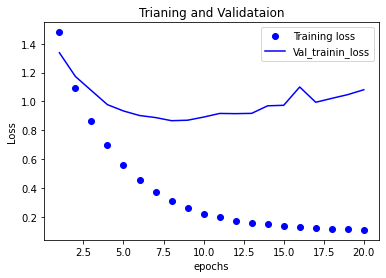

In [29]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Val_trainin_loss')
plt.title('Trianing and Validataion')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

In [31]:
plt.clf()

<Figure size 432x288 with 0 Axes>

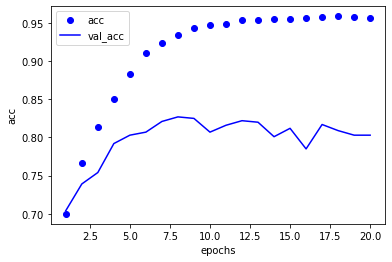

In [38]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs,accuracy,'bo',label = 'acc')
plt.plot(epochs,val_accuracy,'b',label = 'val_acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

In [39]:
model2 = Sequential(
    [
        Dense(64,input_shape = (10000,)),
        Activation('relu'),
        Dense(64),
        Activation('relu'),
        Dense(46),
        Activation('softmax')
    ]
)

In [40]:
model2.compile(
    optimizer='rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [41]:
history = model2.fit(
    partial_x_train,
    partial_y_train,
    epochs = 9,
    batch_size = 512,
    validation_data=(x_val,y_val)
)

Epoch 1/9
16/16 [==============================] - 1s 27ms/step - loss: 3.1459 - accuracy: 0.3766 - val_loss: 1.6783 - val_accuracy: 0.6580
Epoch 2/9
16/16 [==============================] - 0s 18ms/step - loss: 1.4665 - accuracy: 0.7012 - val_loss: 1.2676 - val_accuracy: 0.7260
Epoch 3/9
16/16 [==============================] - 0s 17ms/step - loss: 1.0449 - accuracy: 0.7774 - val_loss: 1.1077 - val_accuracy: 0.7690
Epoch 4/9
16/16 [==============================] - 0s 17ms/step - loss: 0.8210 - accuracy: 0.8262 - val_loss: 1.0173 - val_accuracy: 0.7760
Epoch 5/9
16/16 [==============================] - 0s 17ms/step - loss: 0.6456 - accuracy: 0.8595 - val_loss: 0.9611 - val_accuracy: 0.8070
Epoch 6/9
16/16 [==============================] - 0s 17ms/step - loss: 0.5043 - accuracy: 0.8951 - val_loss: 0.9093 - val_accuracy: 0.8090
Epoch 7/9
16/16 [==============================] - 0s 17ms/step - loss: 0.4039 - accuracy: 0.9154 - val_loss: 0.8776 - val_accuracy: 0.8120
Epoch 8/9
16/16 [===